# HW 1: SIR and SEIR Model Implementation for Pandemic Spread

**Objective:** Implement and analyze the susceptible-infectious-recovered (SIR) compartmental model to understand the dynamics of infectious disease spread. Next, we expand the model to include an exposed compartment, incorporating the effects of births and deaths. Finally, we evaluate how variations in parameters influence model outcomes and discuss the implications for public health strategies.

### A) Model Implementation:
Write a function in MATLAB or Python (preferably within a Jupyter Notebook) to implement the SIR model using the following system of differential equations:

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta SI, \\
\frac{dI}{dt} &= \beta SI - \gamma I, \\
\frac{dR}{dt} &= \gamma I,
\end{aligned}
$$

where:
- $S$ is the number of the susceptible (those at risk of infection),
- $I$ is the number of the infected population (those currently infectious),
- $R$ is the number of the recovered population (those who have recovered and are immune),
- $\beta$ is the transmission rate, and
- $\gamma$ is the recovery rate.

**Hint:** Use numerical methods (e.g., Runge-Kutta, ODE solvers or discretizing the differential equations) to iteratively solve these equations.


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def sir(t, y, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

S0 = 999
I0 = 1
R0 = 0
beta = 0.3 * 1e-3
gamma = 0.1

solution = solve_ivp(sir, [0, 200], [S0, I0, R0], args=(beta, gamma), rtol=1e-6)

### B) SIR Model Simulation:
Simulate the SIR model over a period of 150 days with the following initial conditions and parameters for a total population of $ N = 1000 $ individuals:

- Initial populations: $ S(0) = 999 $, $ I(0) = 1 $, $ R(0) = 0 $,
- Transmission rate: $ \beta = 0.3 \times 10^{-3} $,
- Recovery rate: $ \gamma = 0.1 $.

Generate a plot showing the dynamics of $ S $, $ I $, and $ R $ over time. Label each curve clearly to indicate the compartment it represents.


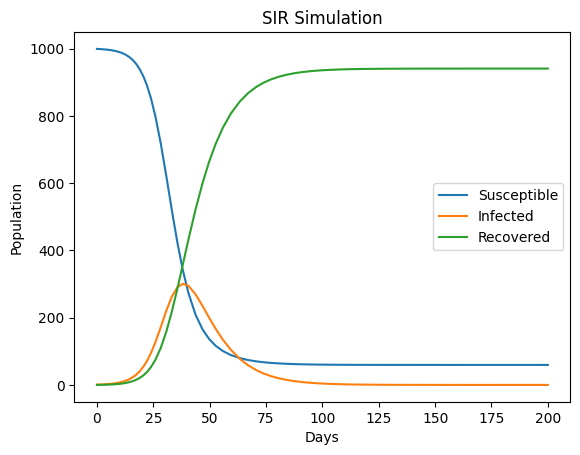

In [3]:
S0 = 999
I0 = 1
R0 = 0
beta = 0.3 * 1e-3
gamma = 0.1

solution = solve_ivp(sir, [0, 200], [S0, I0, R0], args=(beta, gamma), rtol=1e-6)

plt.figure()
plt.plot(solution.t, solution.y.T)
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Simulation')
plt.legend(['Susceptible', 'Infected', 'Recovered'])
plt.show()

### C) Analysis and Interpretation:
Analyze the results of your simulation, focusing on the following aspects:

1. **Infection peak:** Identify the point in time where the number of infected individuals $ I(t) $ reaches its maximum value. Discuss the factors contributing to this peak.

2. **Basic reproductive number $ R_0 $:** Calculate and interpret the basic reproductive number $ R_0 = \frac{\beta}{\gamma} $. Explain how $ R_0 $ influences the overall dynamics of the pandemic, particularly in terms of infection spread and control.

3. **Pandemic dynamics:** Describe the general behavior of the $ S $, $ I $, and $ R $ populations over time. Discuss how the interactions between these compartments represent the spread and eventual containment of the infection.


1. From the figure, we can see that the infection number peak comes around the 35th day. For the factors contributing to this peak, I think the initial number of susceptible individuals, transmission rate, and recovery rate may affect the peak. With a higher initial number of susceptible individuals, a higher transmission rate or a lower recovery rate may make the peak earlier and higher.
2. $ R_0 = \frac{\beta}{\gamma} =  \frac{0.0003}{0.1} = 0.003$. The basic reproductive number reflects the average number of new infections caused by a single individual in a fully susceptible population. A higher $R_0$ means each infected individual can pass the infection to more people. The infection spread means $R_0$ is more than 1, indicating one individual can pass the infection to many people. The infection control means $R_0$ is less than 1, indicating each infected individual is less likely to infect others.
3. S starts high and decreases when more individuals become infected. The decreasing rate somehow illustrates the transmission rate. I initially increased because the disease spread fast at first. When it reaches its peak, it starts to decrease as more individuals are recovering. R increases over time showing the infected individuals recovering, controlled by the recovery rate. The increase and decrease of SIR show a pattern in a pandemic, which is at first the disease spreads fast, with the infection number increasing a lot. Later, more and more infected individuals start to recover, showing a decrease in the infection number.

### D) SEIR Model with Births and Deaths:
We now expand the model to include exposed individuals and account for births and deaths.

1. **Implement the susceptible-exposed-infectious-recovered (SEIR) model** with the following differential equations:

   $$
   \begin{aligned}
   \frac{dS}{dt} &= \mu N - \beta SI - \mu S, \\
   \frac{dE}{dt} &= \beta SI - (\sigma + \mu) E, \\
   \frac{dI}{dt} &= \sigma E - (\gamma + \mu) I, \\
   \frac{dR}{dt} &= \gamma I - \mu R,
   \end{aligned}
   $$

   where $ E $ is the exposed population, $ \sigma $ is the rate of becoming infectious, and $ \mu $ is the birth/death rate.

2. **Simulate for both 365 and 1200 days** with $ S(0) = 990 $, $ E(0) = 9 $, $ I(0) = 1 $, $ R(0) = 0 $, and parameters $ \beta = 0.3 \times 10^{-3} $, $ \gamma = 0.1 $, $ \sigma = 0.2 $, and $ \mu = 0.01 $. Plot the compartment populations over time.

3. **Discuss the pattern observed in the number of infections** in terms of waves of the pandemic.

4. **Discuss the effect of the exposed compartment and birth/death rates** on the pandemic dynamics.


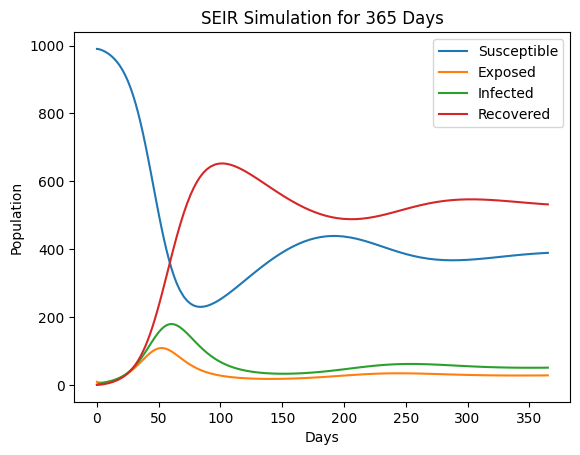

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def seir(t, y, mu, beta, gamma, sigma):
    S, E, I, R = y
    N = S + E + I + R
    dS_dt = mu * N - beta * S * I - mu * S
    dE_dt = beta * S * I - (sigma + mu) * E
    dI_dt = sigma * E - (gamma + mu) * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

S0 = 990
E0 = 9
I0 = 1
R0 = 0
beta = 0.3 * 1e-3
gamma = 0.1
sigma = 0.2
mu = 0.01 

solution = solve_ivp(seir, [0, 365], [S0, E0, I0, R0], args=(mu, beta, gamma, sigma), rtol=1e-6)

plt.figure()
plt.plot(solution.t, solution.y.T)

plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Simulation for 365 Days')
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.show()

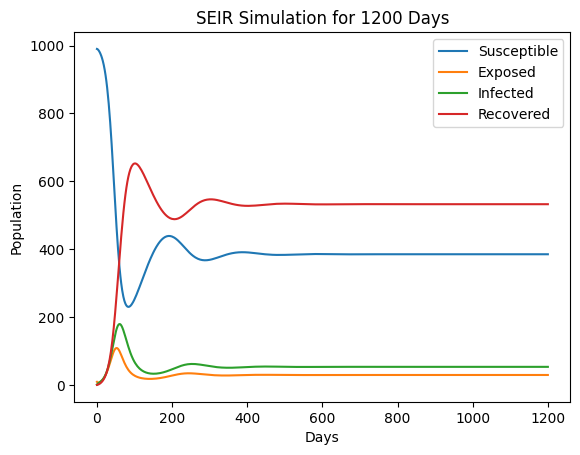

In [5]:
solution = solve_ivp(seir, [0, 1200], [S0, E0, I0, R0], args=(mu, beta, gamma, sigma), rtol=1e-6)

plt.figure()
plt.plot(solution.t, solution.y.T)

plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Simulation for 1200 Days')
plt.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])
plt.show()

3. From the figure, we can see that the infection number first increases a lot, and rapidly reaches the peak, because the disease spread quickly at first. Then falls back to a low level, and this may be because more and more infected individuals start to recover and some of them become immune to this disease. Subsequently, it increases a little bit again and returns to a stable level. This secondary peak may be because of the increasing number of susceptible individuals, due to some recovered individuals becoming susceptible again or due to more new births. The last stable level indicates the pandemic has been in control.
4. In the SEIR model, $\sigma$ controls the exposed compartment, indicating the rate of an individual from being exposed to being infected. A higher $\sigma$ will shorten the exposed period and may increase the infection number peak but decrease the exposed number peak. $\mu$ controls the birth/death rate and maintains the population dynamics. With a higher $\mu$, the number of susceptible individuals may continue to increase, making the pandemic period more long-lasting.

### E) Sensitivity Analysis:
Next, let’s assess how variations in parameters impact model outcomes and implications for public health.

1. **Conduct a sensitivity analysis on the SEIR model** from the previous part by varying $ \beta $ (0.1 x 10^-3 to 0.5 x 10^-3) and $ \gamma $ (0.05 to 0.2).

2. **Plot the peak infection and total infections over a year** for each $ \beta $ and $ \gamma $ combination.

3. **Discuss the implications for public health interventions**, relating $ \beta $ to social distancing and $ \gamma $ to medical treatments.


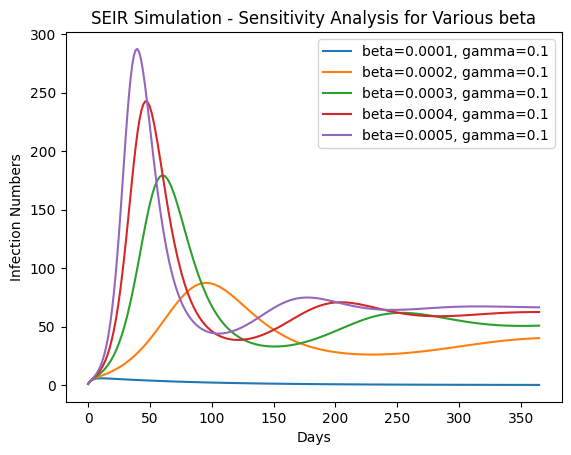

In [9]:
S0 = 990
E0 = 9
I0 = 1
R0 = 0
gamma = 0.1
sigma = 0.2
mu = 0.01 


plt.figure()
betas = np.linspace(0.1e-3, 0.5e-3, 5)
for beta in betas:
    solution = solve_ivp(seir, [0, 365], [S0, E0, I0, R0], args=(mu, beta, gamma, sigma), rtol=1e-6)
    plt.plot(solution.t, solution.y[2], label=f'beta={beta:.4f}, gamma={gamma}')

plt.xlabel('Days')
plt.ylabel('Infection Numbers')
plt.title('SEIR Simulation - Sensitivity Analysis for Various beta')
plt.legend()
plt.show()


From the figure, we can see that a higher $\beta$ will increase the peak infection numbers and make the peak earlier. $\beta$ is the transmission rate, denoting the average number of infected individuals transmitted to susceptible individuals per unit of time by an infected individual. A higher $\beta$ means the disease spreads faster. Control and increased social distance can decrease $\beta$, thus slowing down the disease spreading and the infection number peak.

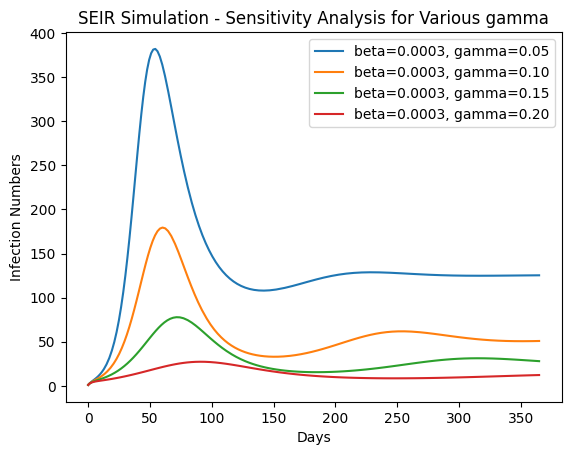

In [8]:
S0 = 990
E0 = 9
I0 = 1
R0 = 0
beta = 0.3 * 1e-3
sigma = 0.2
mu = 0.01 


plt.figure()
gammas = np.linspace(0.05, 0.2, 4)
for gamma in gammas:
    solution = solve_ivp(seir, [0, 365], [S0, E0, I0, R0], args=(mu, beta, gamma, sigma), rtol=1e-6)
    plt.plot(solution.t, solution.y[2], label=f'beta={beta}, gamma={gamma:.2f}')

plt.xlabel('Days')
plt.ylabel('Infection Numbers')
plt.title('SEIR Simulation - Sensitivity Analysis for Various gamma')
plt.legend()
plt.show()


From the figure, we can see that a higher $\gamma$ will decrease the infection number peak. $\gamma$ is the recovery rate, denoting the average rate at which an individual transitions from an infected state to a recovered state. A higher $\gamma$ means an infected individual will become healthy in a shorter time, thus decreasing the infection number peak and reducing the overall infection level. Increasing the $\gamma$ can be achieved through medical interventions, such as providing more effective treatments or speeding up the treatment process.